In [1]:
import numpy as np
import queue
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

85


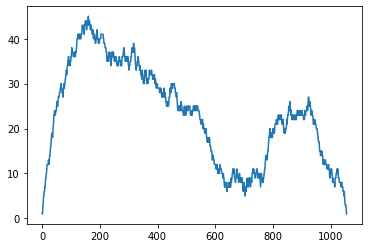

In [5]:
def is_Ag(n:int) -> bool:
    return n % 24 == 17

def operation_v(n:int) -> int:
    return 4*n+1

def operation_v_n_times(start:int, n:int) -> int:
    res = start
    for i in range(1, n):
        res = operation_v(res)
    return res

def generate_v_series(start:int, n:int) -> list[int]:
    res = [0]*n
    for i in range(0, n):
        res[i] = operation_v_n_times(start, i+1)
    return res

def remove_0mod3(v_series:list[int]) -> list[int]:
    res = []
    for i in v_series:
        if i%3 > 0:
            res.append(i)
    return res

def syr_min_1(v_series:list[int]) -> list[int]:
    res = []
    for i in v_series:
        if i> 1:
            if i%3 == 1:
                #Type C case
                res.append((4*i-1)//3)
            elif i%3 == 2:
                #Type A case
                res.append((2*i-1)//3)
    return res

array_growth = []
def func2(s:int, max_bin_len:int)->int:
    global array_growth
    array_growth = []
    
    x=0
    arr=[]
    arr.append(s)
    q = queue.Queue()
    q.put(s)
    n = s
    while len(arr) > 0:
        array_growth.append(len(arr))

        if n%3 == 2:
            #Type A case
            temp1 = (2*n-1)//3
            arr.append(temp1)
            if is_Ag(n):
                x += 1
            if len(np.binary_repr(n)) < len(np.binary_repr(s))+max_bin_len-1:
                temp2 = operation_v(n)
                arr.append(temp2)
        elif n%3 == 0:
            #Type B case
            if len(np.binary_repr(n)) < len(np.binary_repr(s))+max_bin_len-1:
                temp1 = operation_v(n)
                arr.append(temp1)
        elif n%3 == 1:
            #Type C case
            if len(np.binary_repr(n)) < len(np.binary_repr(s))+max_bin_len and n>1:
                temp1 = (4*n-1)//3
                arr.append(temp1)
            if len(np.binary_repr(n)) < len(np.binary_repr(s))+max_bin_len-1:
                temp2 = operation_v(n)
                arr.append(temp2)
        
        n = arr[0]
        del arr[0]
    return x

start = 3
max_bin_len = 10
print(func2(start, max_bin_len))

l = len(array_growth)
y_val = array_growth
x_val = range(0, l)

d = {"x":x_val, "array_growth":y_val}
df = pd.DataFrame(d)
df.to_csv('array_growth.csv', index=False)

plt.plot(x_val, y_val)
plt.show()

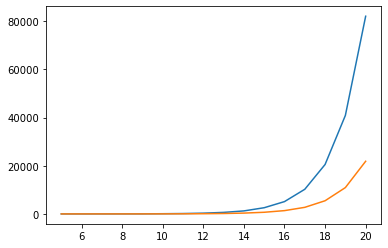

In [8]:
start = 3
max_bin_len = 20
x_val=[]
y_val=[]
y_val2=[]
for mbl in range(5, max_bin_len+1):
    x_val.append(mbl)
    y_val.append(func2(start, mbl))
    y_val2.append(2**(mbl-1)/24)

d = {"x":x_val, "max_bin_length":y_val}
df = pd.DataFrame(d)
df.to_csv('max_bin_length.csv', index=False)

plt.plot(x_val, y_val)
plt.plot(x_val, y_val2)  
plt.show()

In [10]:
def func3(s:int, max_bin_len:int)->int:    
    x=0
    q = queue.Queue()
    q.put(s)
    while not q.empty():
        n = q.get()
        if n%3 == 2:
            #Type A case
            q.put((2*n-1)//3)
            if is_Ag(n):
                x += 1
            if len(np.binary_repr(n)) < len(np.binary_repr(s))+max_bin_len-1:
                q.put(operation_v(n))
        elif n%3 == 0:
            #Type B case
            if len(np.binary_repr(n)) < len(np.binary_repr(s))+max_bin_len-1:
                q.put(operation_v(n))
        elif n%3 == 1:
            #Type C case
            if len(np.binary_repr(n)) < len(np.binary_repr(s))+max_bin_len and n>1:
                q.put((4*n-1)//3)
            if len(np.binary_repr(n)) < len(np.binary_repr(s))+max_bin_len-1:
                q.put(operation_v(n))
    return x

start = 3
max_bin_len = 20
print(func3(start, max_bin_len))

82015


In [ ]:
x_val=[]
y_val=[]
y_val2=[]
for mbl in range(5, max_bin_len+1):
    x_val.append(mbl)
    y_val.append(func3(start, mbl))
    y_val2.append(2**(mbl-1)/24)

d = {"x":x_val, "max_bin_length":y_val}
df = pd.DataFrame(d)
df.to_csv('max_bin_length.csv', index=False)

plt.plot(x_val, y_val)
plt.plot(x_val, y_val2)  
plt.show()

12


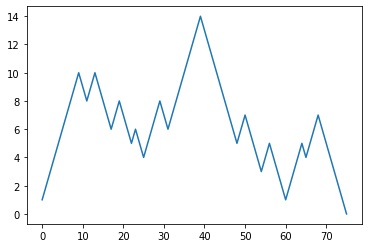

In [3]:
recursion_jumps = []
def func(start:int, max_bin_len:int, x:int)->int:
    global recursion_jumps
    recursion_jumps.append(1)
    
    b=len(np.binary_repr(start))
    if is_Ag(start):
        x += 1
    v_series = generate_v_series(start, (max_bin_len-b)//2)
    thinned_out_series = remove_0mod3(v_series)
    syr_min1_series = syr_min_1(thinned_out_series)
    for i in syr_min1_series:
        if is_Ag(i):
            x += 1
        x = func(i, max_bin_len, x)
    recursion_jumps.append(-1)
    return x

start = 3
max_bin_len = 10
print(func(start, max_bin_len, 0))

l = len(recursion_jumps)
x_val = range(0, l)
y_val = [1]*l
for i in range(1, l):
    y_val[i] = y_val[i-1]+recursion_jumps[i]

#print(y_val)
plt.plot(x_val, y_val)
plt.show()

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0.0, 1.5, 0.75, 0.75, 0.75, 0.65625, 0.515625, 0.5390625, 0.515625, 0.84375, 0.814453125, 0.8056640625, 0.79248046875, 0.7877197265625, 0.79522705078125, 0.792388916015625]


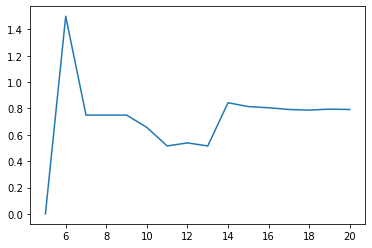

In [12]:
start = 1
max_bin_len = 20
x_val=[]
y_val=[]
for mbl in range(5, max_bin_len+1):
    x_val.append(mbl)
    y = func(start, mbl, 0)
    y = y/(2**(mbl-1)/24)
    y_val.append(y)

print(x_val)
print(y_val)

plt.plot(x_val, y_val)  
plt.show()

syr_min1_series: {0} [1, 3, 113, 227, 7281, 14563, 466033, 932067, 29826161, 59652323, 1908874353, 3817748707, 122167958641, 244335917283, 7818749353073, 15637498706147, 500399958596721, 1000799917193443, 32025597350190193, 64051194700380387, 2049638230412172401, 4099276460824344803, 131176846746379033713, 262353693492758067427, 8395318191768258157681, 16790636383536516315363, 537300364273168522091633, 1074600728546337044183267, 34387223313482785413864561, 68774446626965570827729123, 2200782292062898266487331953, 4401564584125796532974663907, 140850066692025489055189245041, 281700133384050978110378490083, 9014404268289631299532111682673, 18028808536579262599064223365347, 576921873170536403170055147691121, 1153843746341072806340110295382243, 36922999882914329802883529452231793, 73845999765828659605767058904463587, 2363071992506517107384545884942834801, 4726143985013034214769091769885669603, 151236607520417094872610936636341427313, 302473215040834189745221873272682854627, 967914288130669

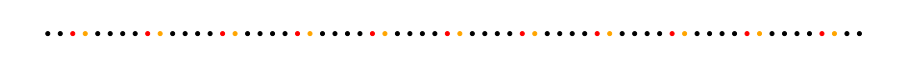

In [39]:
start = 1
max_bin_len = 200
b=len(np.binary_repr(start))
v_series = generate_v_series(start, (max_bin_len-b)//2)
thinned_out_series = remove_0mod3(v_series)
syr_min1_series = syr_min_1(thinned_out_series)

res = syr_min1_series
l = len(res)
x = range(1, l+1)
y = [1]*l
colors = ["black"]*l
for idx, i in enumerate(res):
    if i%3 == 2:
        colors[idx]="orange"
    if is_Ag(i):
        colors[idx]="red"

#print("v_series: {0}", v_series)
#print("thinned_out_series: {0}", thinned_out_series)
print("syr_min1_series: {0}", syr_min1_series)

figure(figsize=(16, 1))
plt.scatter(x, y, s=16, c=colors, alpha=1)
plt.axis('off')
plt.show()

In [10]:
def numberToBase(n, b):
    if n == 0:
        return [0]
    digits = []
    while n:
        digits.append(int(n % b))
        n //= b
    return digits[::-1]

def count_17mod24(series:list[int]) -> int:
    res = 0
    for i in series:
        if i%24 == 17:
            res+=1
    return res

